In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

In [6]:
np.random.seed(42)

In [7]:
import os
from skimage.transform import rescale, resize
from skimage.feature import hog

In [8]:
folders = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']
image_vectors = []
Labels = []
for d in folders:
    label = folders.index(d)
    for file in os.listdir(f'data\\{d}'):
        image = io.imread(f'data\\{d}\\{file}', as_gray=True)
        for scaler in [1/2, 1/3]:
            rescaled_image = rescale(image, scaler)
            resized_image = resize(rescaled_image, (228,228))
            hog_feature = hog(resized_image)
            image_vectors.append(hog_feature)
            Labels.append(label)

In [9]:
feature_vectors = np.array(image_vectors)
labels = np.array(Labels)

In [10]:
feature_vectors.shape

(240, 54756)

In [11]:
# Spliting in Train, Test Set
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(
    feature_vectors, labels, test_size=0.25
)

In [12]:
train_images.shape, train_labels.shape

((180, 54756), (180,))

In [13]:
train_images[0].shape

(54756,)

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(train_images, train_labels)

LogisticRegression(max_iter=5000)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


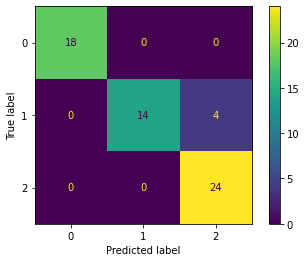

In [15]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(model, test_images, test_labels)

In [16]:
ypred = model.predict(test_images).astype(np.float64)
accuracy_score(test_labels, ypred)

0.9333333333333333

# SVM

In [17]:
from sklearn import svm
svc = svm.SVC()
svc.fit(train_images, train_labels)

SVC()

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


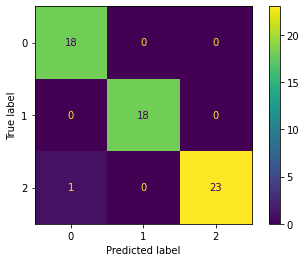

In [18]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(svc, test_images, test_labels)

In [19]:
ypred = svc.predict(test_images).astype(np.float64)
accuracy_score(test_labels, ypred)

0.9833333333333333

# Neural Network

In [20]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(activation='logistic',hidden_layer_sizes=(784, 228),verbose=2)
nn.fit(train_images, train_labels)

Iteration 1, loss = 1.09925623
Iteration 2, loss = 1.32554945
Iteration 3, loss = 0.91623762
Iteration 4, loss = 1.04235662
Iteration 5, loss = 0.91090575
Iteration 6, loss = 0.77051679
Iteration 7, loss = 0.72921380
Iteration 8, loss = 0.71506626
Iteration 9, loss = 0.68783628
Iteration 10, loss = 0.64244101
Iteration 11, loss = 0.58916870
Iteration 12, loss = 0.54132010
Iteration 13, loss = 0.49995658
Iteration 14, loss = 0.45580402
Iteration 15, loss = 0.40844696
Iteration 16, loss = 0.36618785
Iteration 17, loss = 0.32901121
Iteration 18, loss = 0.29283455
Iteration 19, loss = 0.25695851
Iteration 20, loss = 0.22306681
Iteration 21, loss = 0.19025993
Iteration 22, loss = 0.15998204
Iteration 23, loss = 0.13493601
Iteration 24, loss = 0.11455160
Iteration 25, loss = 0.09689732
Iteration 26, loss = 0.08159133
Iteration 27, loss = 0.06893549
Iteration 28, loss = 0.05874980
Iteration 29, loss = 0.05048365
Iteration 30, loss = 0.04369175
Iteration 31, loss = 0.03807854
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(784, 228), verbose=2)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


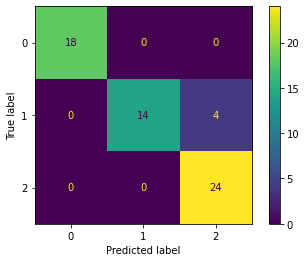

In [21]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(nn, test_images, test_labels)

In [22]:
ypred = nn.predict(test_images).astype(np.float64)
accuracy_score(test_labels, ypred)

0.9333333333333333

In [23]:
from joblib import dump
dump(nn, 'CropDiseaseClassifier')

['CropDiseaseClassifier']